Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv
Jumlah data: (1470, 32)
Missing values total: 0

=== Ringkasan Data ===
                Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     147

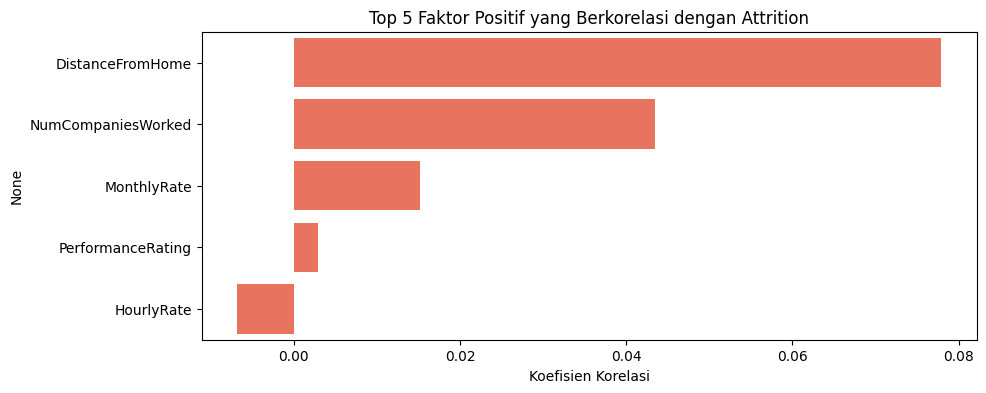

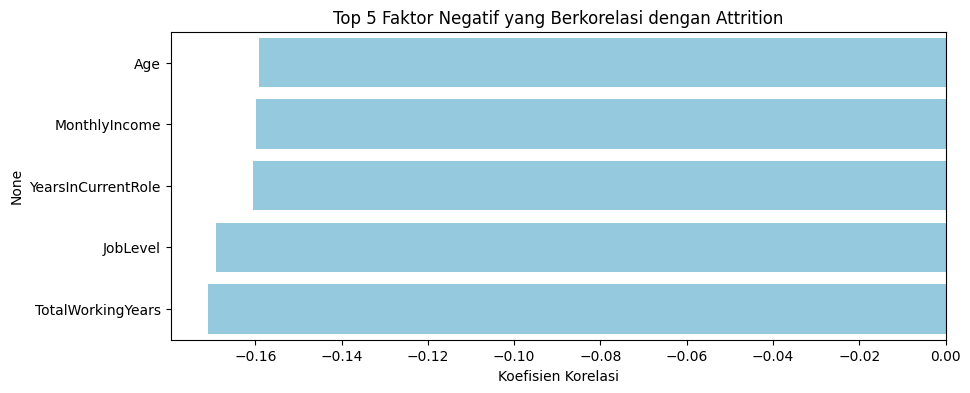

/tmp/ipython-input-1976141494.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


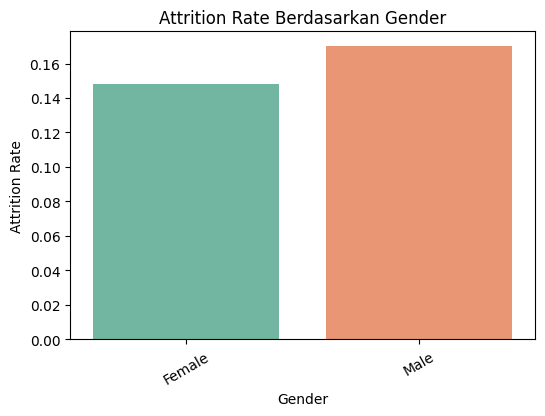

/tmp/ipython-input-1976141494.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


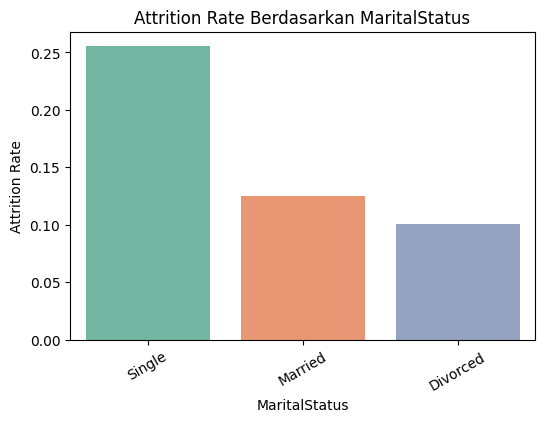

/tmp/ipython-input-1976141494.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


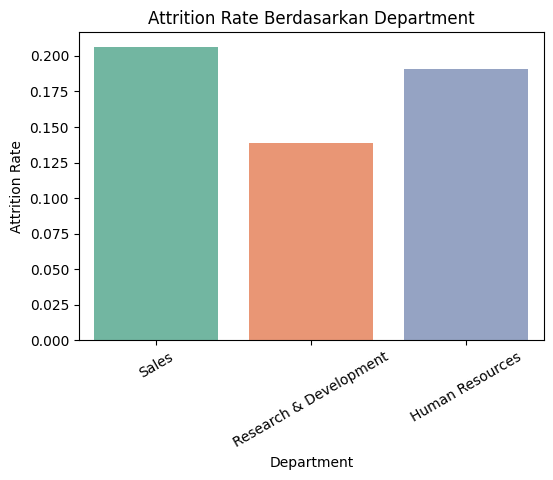

/tmp/ipython-input-1976141494.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


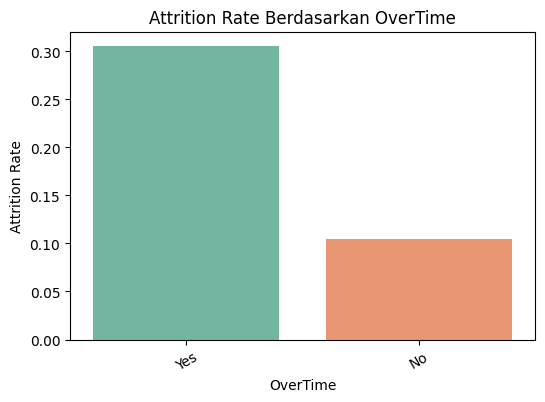

/tmp/ipython-input-1976141494.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


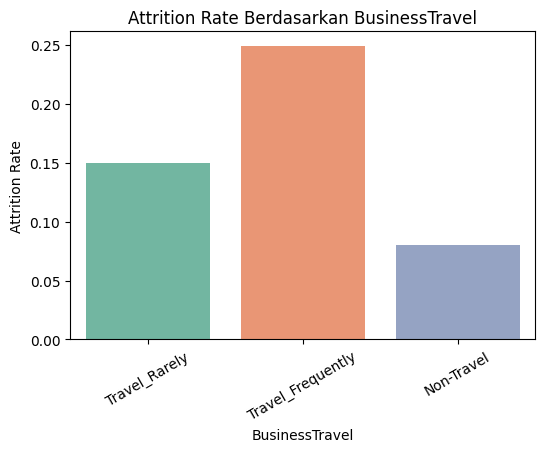

/tmp/ipython-input-1976141494.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


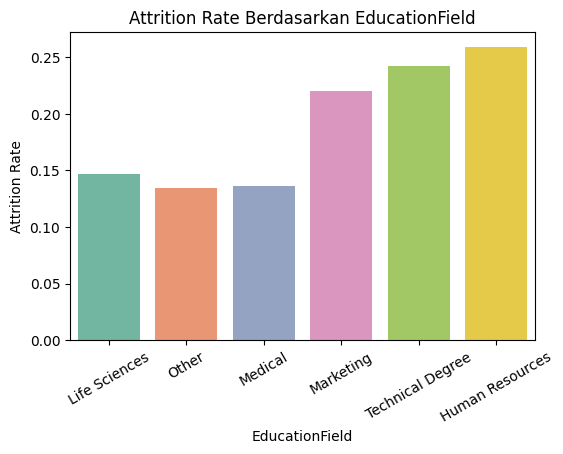

/tmp/ipython-input-1976141494.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


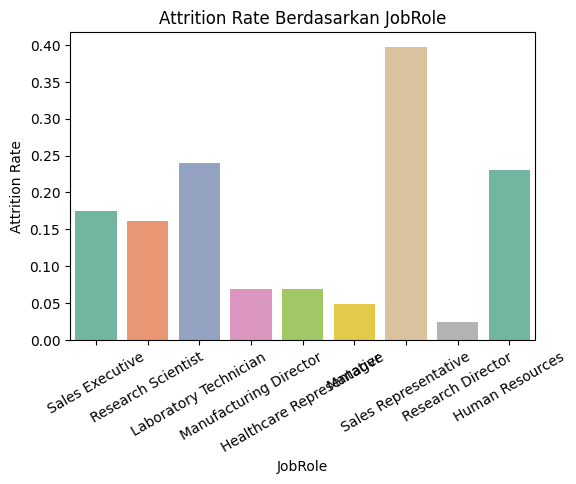


File berhasil disimpan: /content/hr_attrition_clean.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# ===========================================
# HR Analytics Dashboard Preparation
# Dataset: IBM HR Analytics Attrition
# ===========================================

# === 1. Import Libraries ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 2. Upload & Load Dataset ===
from google.colab import files
uploaded = files.upload()

# Baca file
df = pd.read_csv(list(uploaded.keys())[0])

# === 3. Data Preparation ===
df_clean = df.drop(columns=["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"])

# Encode Attrition menjadi angka (Yes=1, No=0)
df_clean["AttritionFlag"] = df_clean["Attrition"].map({"Yes": 1, "No": 0})

# Cek jumlah data & missing values
print("Jumlah data:", df_clean.shape)
print("Missing values total:", df_clean.isnull().sum().sum())

# === 4. Statistik Awal ===
print("\n=== Ringkasan Data ===")
print(df_clean.describe(include='all'))

# Rasio attrition
attrition_rate = df_clean["AttritionFlag"].mean() * 100
print(f"\nRata-rata Attrition Rate: {attrition_rate:.2f}%")

# === 5. Korelasi Numerik dengan Attrition ===
corr = df_clean.corr(numeric_only=True)["AttritionFlag"].sort_values(ascending=False)

top_corr = corr.drop("AttritionFlag").head(5)
bottom_corr = corr.drop("AttritionFlag").tail(5)

print("\n=== Korelasi Positif Tertinggi ===")
print(top_corr)

print("\n=== Korelasi Negatif Tertinggi ===")
print(bottom_corr)

# Visualisasi
plt.figure(figsize=(10, 4))
sns.barplot(x=top_corr.values, y=top_corr.index, color="tomato")
plt.title("Top 5 Faktor Positif yang Berkorelasi dengan Attrition")
plt.xlabel("Koefisien Korelasi")
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(x=bottom_corr.values, y=bottom_corr.index, color="skyblue")
plt.title("Top 5 Faktor Negatif yang Berkorelasi dengan Attrition")
plt.xlabel("Koefisien Korelasi")
plt.show()

# === 6. Analisis Fitur Kategorikal ===
categorical_features = [
    "Gender", "MaritalStatus", "Department",
    "OverTime", "BusinessTravel", "EducationField", "JobRole"
]

for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.barplot(
        x=col,
        y="AttritionFlag",
        data=df_clean,
        estimator=lambda x: sum(x)/len(x),
        errorbar=None, palette="Set2"
    )
    plt.title(f"Attrition Rate Berdasarkan {col}")
    plt.ylabel("Attrition Rate")
    plt.xticks(rotation=30)
    plt.show()

# === 7. Simpan Dataset Bersih untuk Power BI ===
output_path = "/content/hr_attrition_clean.csv"
df_clean.to_csv(output_path, index=False)

print("\nFile berhasil disimpan:", output_path)

# Download ke lokal
files.download(output_path)
